<a href="https://colab.research.google.com/github/pedrohmpaiva/deteccao_fraude_cartao_credito/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://github.com/pedrohmpaiva/portfolio/blob/main/banner.png?raw=true">

*por: [Pedro Henrique M. Paiva](https://www.linkedin.com/in/pedro-henrique-paiva/)*  

---

# Detecção de Fraude em Cartões de Crédito

Neste projeto, suregido pelo curso [DSNP - Sigmoidal](https://sigmoidal.ai/), iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Segundo [esta matéria](https://valorinveste.globo.com/produtos/servicos-financeiros/noticia/2020/02/12/brasil-e-2o-pais-da-america-latina-com-mais-fraudes-no-cartao-em-compras-online.ghtml), em 2020 o Brasil foi o 2º país da américa latina com mais fraudes em compras online e no primeiro semestre de 2021 [teve alta de quase 33% nas tentativas de fraude com cartão de crédito](https://www.infomoney.com.br/minhas-financas/brasil-teve-alta-de-quase-33-nas-tentativas-de-fraude-com-cartao-de-credito-no-1-semestre-mostra-estudo/).

<p align=center>
<img src="https://img.freepik.com/fotos-gratis/homem-hacker-no-laptop_144627-25527.jpg?w=1380&t=st=1650512651~exp=1650513251~hmac=71e86ae27a9ebabffa336182bf8bce35a568a1f0261b81339b5bc789ed16efce" width="90%"></p>

Dentre essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.
<p align=center>
    <img src="https://img.freepik.com/fotos-gratis/cartao-de-plastico-do-banco-pendurado-no-gancho-de-pesca-closeup-conceito-de-fraude-na-internet_151013-35671.jpg?w=1800" width="50%" align = right></p>


Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe é que as *features* são todas numéricas, e foram descaracterizadas (por preservação da privacidade e da segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 



[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

---

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# importando os pacotes necessários
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import classification_report
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import mean_squared_error, mean_absolute_error
from sklearn.tree            import DecisionTreeClassifier, plot_tree
from sklearn.ensemble        import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.linear_model    import SGDClassifier
from sklearn.metrics         import precision_score, recall_score, accuracy_score, f1_score
from sklearn                 import metrics

from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling  import SMOTE

In [4]:
# importando os dados para um DataFrame

file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

df = pd.read_csv(file_path)
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


---
Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados.

# Análise Exploratória

O objetivo desta etapa é ver o que inicialmente os dados tem a nos oferecer em insights, verificar a distribuição das classes, verificar se há valores ausentes, etc.

In [5]:
#Verificando as 5 primeiras entradas e a dimensão do dataset

print('*** Dimensionalidade do dataset {} ***'.format(df.shape))
df.head()

*** Dimensionalidade do dataset (284807, 31) ***


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#Verificando algumas informações sobre o dataset e suas features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#Verificando se há valores ausentes

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
#Resumo estatístico do dataset

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
#Verificando a distribuição de classes

semFraude = df['Class'].value_counts()[0]
fraude = df['Class'].value_counts()[1]
print('Transações normais: {}'.format(semFraude))
print('Transações fraudulentas: {}'.format(fraude))

Transações normais: 284315
Transações fraudulentas: 492


In [10]:
#Cores

preto_titulo = '#363434'
preto_elementos = '#5c5757'
azul = '#1f4287' # original da paleta: '#62929a' alternativa: #4b89ac
cinza = '#efecec'

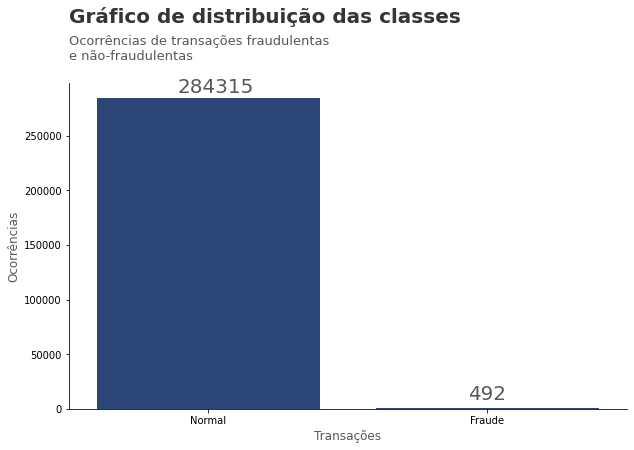

In [11]:
#Plotando um grafico da distribuição das classes

fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(df['Class'], color= azul)

ax.set_title('Gráfico de distribuição das classes', 
             fontsize = 20, 
             color = preto_titulo, 
             loc = 'left', 
             pad= 60, 
             fontweight= 'bold')

ax.text(-0.5,320000, 
        'Ocorrências de transações fraudulentas\ne não-fraudulentas', 
        fontsize = 13, color = preto_elementos)

ax.set_xticklabels(labels=['Normal', 'Fraude'])
ax.set_xlabel('Transações',  fontsize = 12, color= preto_elementos)
ax.set_ylabel('Ocorrências', fontsize = 12, color= preto_elementos)

ax.spines['top'].set_visible(False)

ax.annotate(semFraude, 
            xy=(-0.11, 290000), 
            color = preto_elementos, 
            fontsize= 20,
            fontweight='light')
ax.annotate(fraude, 
            xy=(0.93, 9000), 
            color = preto_elementos, 
            fontsize= 20,
            fontweight='light')

ax.spines['right'].set_visible(False)

## Plotando os histogramas da variável "Time" (Fraude e não-fraude)

A variável "Time" representa o tempo (em segundos) decorrido entre a primeira transação do dataset e a atual.

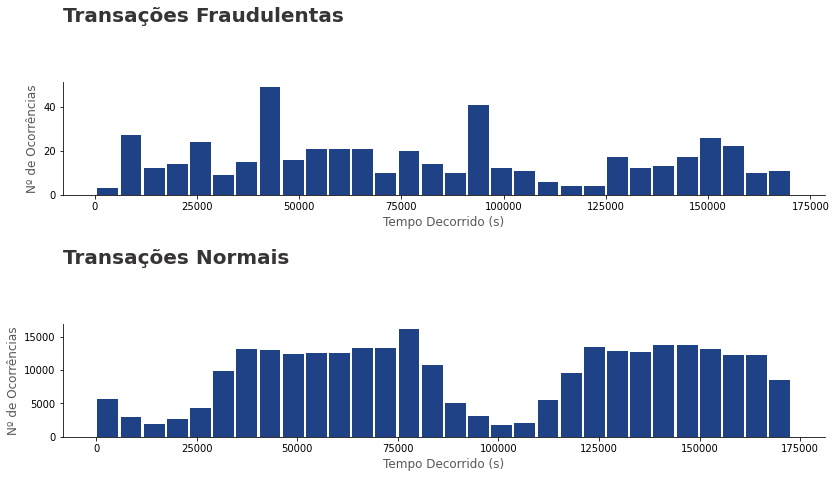

In [12]:
fig, ax = plt.subplots(nrows=2, ncols = 1, figsize=(12,7))


ax[0].hist(df.Time[df.Class == 1], bins = 30, color= azul, rwidth= 0.9)
ax[0].set_title('Transações Fraudulentas',fontsize = 20, 
                color = preto_titulo, 
                loc = 'left', 
                pad= 60, 
                fontweight= 'bold')
ax[0].set_xlabel('Tempo Decorrido (s)', fontsize = 12, color= preto_elementos)
ax[0].set_ylabel('Nº de Ocorrências'  , fontsize = 12, color= preto_elementos)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)


ax[1].hist(df.Time[df.Class == 0], bins = 30, color= azul, rwidth= 0.9)
ax[1].set_title('Transações Normais',
                fontsize = 20,
                color = preto_titulo, 
                loc = 'left', 
                pad= 60, 
                fontweight= 'bold')
ax[1].set_xlabel('Tempo Decorrido (s)', fontsize = 12, color= preto_elementos)
ax[1].set_ylabel('Nº de Ocorrências'  , fontsize = 12, color= preto_elementos)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

fig.tight_layout(pad = 2)

## Plotando os histogramas da variável "Amount" (Fraude e não-fraude)

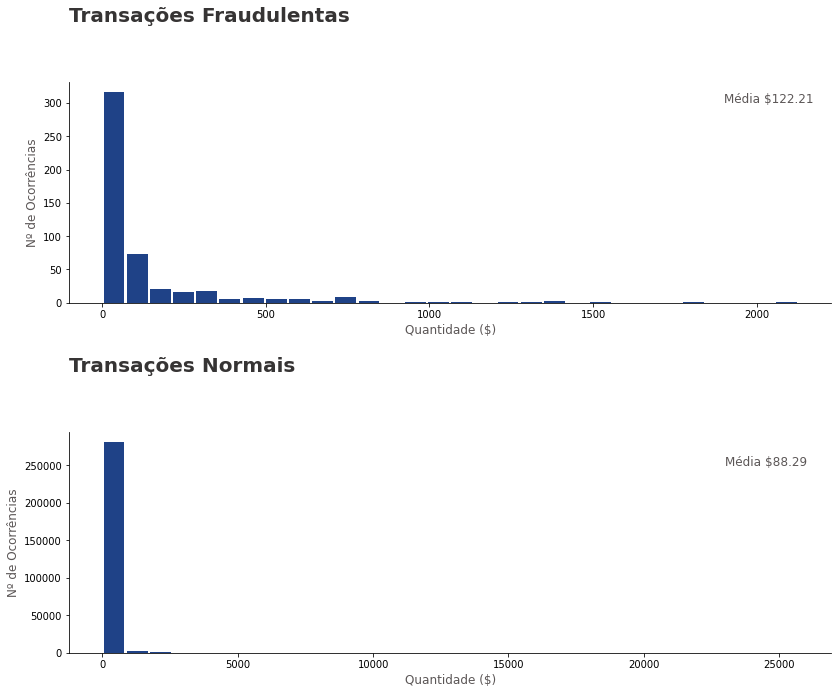

In [13]:
fig, ax = plt.subplots(nrows=2, ncols = 1, figsize=(12,10))


ax[0].hist(df.Amount[df.Class == 1], bins = 30, color= azul, rwidth= 0.9)

ax[0].text(1900,300, "Média ${:.2f}".format(df.Amount[df.Class == 1].mean()),
           fontsize = 12, color= preto_elementos)

ax[0].set_title('Transações Fraudulentas',
                fontsize = 20,
                color = preto_titulo, 
                loc = 'left', 
                pad= 60, 
                fontweight= 'bold')
ax[0].set_xlabel('Quantidade ($)'   , fontsize = 12, color= preto_elementos)
ax[0].set_ylabel('Nº de Ocorrências', fontsize = 12, color= preto_elementos)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)



ax[1].hist(df.Amount[df.Class == 0], bins = 30, color= azul, rwidth= 0.9)

ax[1].text(23000,250000, "Média ${:.2f}".format(df.Amount[df.Class == 0].mean()),
           fontsize = 12, color= preto_elementos)

ax[1].set_title('Transações Normais',
                fontsize = 20,
                color = preto_titulo, 
                loc = 'left', 
                pad= 60, 
                fontweight= 'bold')

ax[1].set_xlabel('Quantidade ($)'   , fontsize = 12, color= preto_elementos)
ax[1].set_ylabel('Nº de Ocorrências', fontsize = 12, color= preto_elementos)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)



fig.tight_layout(pad = 2)

As transações fraudulentas tem menos ocorrências neste conjunto de dados, como vimos anteriormente. Talvez por isto a média das transações fraudulentas se mostre maior do que as transações normais, como foi visto no gráfico acima. 


Vejo que a maioria das transações normais feitas durante esta coleta de dados estão focadas entre 0 e 5000 dólares, com uma média de 88 dólares.

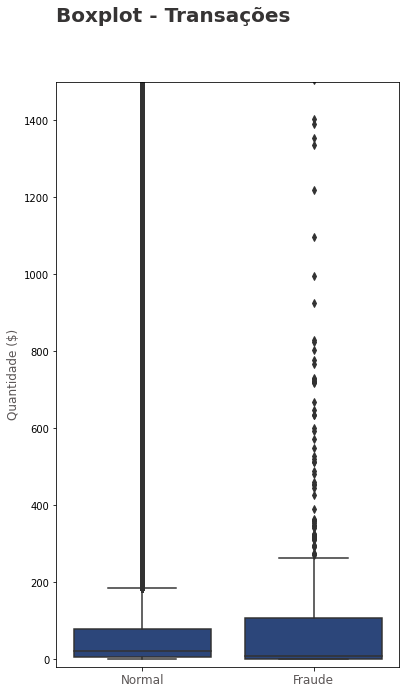

In [14]:
# Boxplot das transações "fraude" e "normais"

fig, ax = plt.subplots(figsize=(6,10))

sns.boxplot(df.Class, df.Amount, ax=ax, color= azul)
plt.ylim((-20, 1500))
plt.xticks([0, 1], ['Normal', 'Fraude'],fontsize = 12, color= preto_elementos)

ax.set_title('Boxplot - Transações',
                fontsize = 20,
                color = preto_titulo, 
                loc = 'left', 
                pad= 60, 
                fontweight= 'bold')
ax.set_ylabel('Quantidade ($)',fontsize = 12, color= preto_elementos)
ax.set_xlabel('')

plt.tight_layout(pad = 2)

***Fiz um corte limitando a quantidade até 1500 dólares com o objetivo de uma visualização mais agradável***

---

In [15]:
#Matriz de correlação

corr_  = df.corr(method= 'spearman')

pd.DataFrame(corr_).style.background_gradient(cmap='coolwarm')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.190647,-0.006419,-0.473348,-0.142156,0.226004,-0.111408,0.116722,-0.103882,0.017986,0.014692,-0.227116,0.073665,-0.045340,-0.092388,-0.205421,0.002415,-0.102351,0.090840,0.025136,-0.120319,0.096564,0.132651,0.148505,-0.015980,-0.259220,0.000132,-0.035063,-0.143200,-0.040007,-0.011692
V1,0.190647,1.000000,-0.384328,-0.412095,0.101011,-0.106632,-0.086561,-0.227650,-0.236140,0.138614,0.231636,0.013750,0.003095,0.047839,-0.024329,0.030048,0.037791,-0.057902,-0.043565,0.031168,-0.209614,-0.061958,-0.028827,0.145440,-0.000315,0.049291,0.006380,-0.104815,-0.207967,-0.086663,-0.042424
V2,-0.006419,-0.384328,1.000000,0.073967,0.155042,0.342701,-0.110393,0.426320,0.006980,-0.077880,-0.212437,-0.013464,0.052846,0.028702,0.088108,0.038186,0.068053,-0.002416,0.011481,0.002082,0.040716,-0.098255,-0.056478,-0.094982,0.012617,-0.085682,0.033865,0.129234,0.137976,-0.502052,0.051062
V3,-0.473348,-0.412095,0.073967,1.000000,0.060812,-0.223849,0.171263,-0.074582,0.164374,-0.030876,-0.070960,0.056105,-0.051875,0.006839,-0.130565,0.051314,-0.046590,-0.035420,-0.045167,-0.015326,0.108271,-0.040234,0.004404,-0.140076,-0.000559,0.031854,-0.016689,0.140724,0.180169,-0.000236,-0.059278
V4,-0.142156,0.101011,0.155042,0.060812,1.000000,0.021367,0.075185,0.059920,-0.009608,0.105248,0.025553,-0.013122,0.147738,-0.024538,0.099464,0.053405,-0.041414,0.049298,0.021175,-0.017866,-0.009598,0.038960,-0.004931,0.009615,-0.008782,0.060647,-0.064357,-0.033634,0.004757,-0.022117,0.063045
V5,0.226004,-0.106632,0.342701,-0.223849,0.021367,1.000000,-0.007577,0.431573,-0.057022,-0.056580,-0.154910,0.010749,-0.048560,0.019549,0.035107,-0.041029,-0.007564,-0.145735,-0.016252,0.012257,0.056719,-0.040364,-0.010920,-0.108300,-0.023076,-0.015618,0.029513,0.012883,-0.027806,-0.314061,-0.030147
V6,-0.111408,-0.086561,-0.110393,0.171263,0.075185,-0.007577,1.000000,-0.292680,0.444053,0.028864,0.063326,0.059672,0.037176,-0.004068,-0.068788,-0.046259,-0.020208,-0.027470,0.052293,0.031965,0.052824,0.034595,0.040370,-0.050293,-0.135166,-0.011131,-0.023932,0.073772,0.020459,0.205452,-0.038410
V7,0.116722,-0.227650,0.426320,-0.074582,0.059920,0.431573,-0.292680,1.000000,-0.389213,-0.100252,-0.207930,0.003714,-0.043924,-0.015749,0.058462,-0.051186,-0.120372,-0.147005,-0.070876,0.000808,0.160522,-0.022250,-0.023750,-0.186343,-0.012879,-0.046468,0.016724,-0.094494,0.056405,-0.030003,-0.048308
V8,-0.103882,-0.236140,0.006980,0.164374,-0.009608,-0.057022,0.444053,-0.389213,1.000000,-0.002511,-0.120992,0.053048,0.106016,-0.144864,0.041255,-0.016752,0.089504,0.074985,0.066508,-0.033248,0.006028,0.076569,0.019775,0.075212,-0.024536,-0.074303,-0.007648,0.189916,0.089700,0.004371,0.022706
V9,0.017986,0.138614,-0.077880,-0.030876,0.105248,-0.056580,0.028864,-0.100252,-0.002511,1.000000,-0.291153,-0.031365,0.103193,-0.047521,-0.031144,-0.004438,-0.031735,-0.068576,-0.014809,0.003057,-0.015357,-0.065773,0.001958,0.074164,-0.001572,-0.022575,0.026677,-0.001804,-0.103743,-0.077437,-0.049499


### Conclusões da análise exploratória


* O dataset não possui valores ausentes para serem tratados.
* As classes que representam transações fraudulentas e não-fraudulentas estão totalmente desbalanceadas e isso precisará ser tratado. Se usarmos o conjunto de dados assim mesmo, o modelo não irá generalizar bem o padrão da classe que representa fraude, ficando muito bom apenas em detectar transações não fraudulentas.
* As variáveis "Time" e "Amount" estão em grandezas diferentes do restante das outras *features*. Estas duas colunas precisarão ser normalizadas, já que todo o *dataset* se encontra também normalizado. Caso isso não ocorra, acarretará em dificuldades na hora de treinar o modelo.


# Preparação dos Dados
---

Aqui, os dados serão preparados para posteriormente haver a criação do modelo e treiná-lo. Nesta etapa irei:

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e teste
* Balancear o conjunto de dados

In [16]:
#Criando uma cópia do dataframe

df_limpo = df.copy()

In [17]:
#Importando o algoritmo que usarei para normalizar os dados

scaler = StandardScaler()

In [18]:
#Atribuindo ao modelo as variáveis "Time" e "Amount" e criando novas variáveis dentro do dataframe

df_limpo['ss_time'] = scaler.fit_transform(df_limpo[['Time']])
df_limpo['ss_amount'] = scaler.fit_transform(df_limpo[['Amount']])

In [19]:
#Deletando as variáveis não-normalizadas

df_limpo.drop(['Time', 'Amount'], axis= 1, inplace= True)

In [20]:
#Conferindo o resultado

df_limpo.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,ss_time,ss_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-1.996541,-0.338556
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,-1.996499,-0.333279
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0,-1.996436,-0.190107
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0,-1.996436,0.019392
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0,-1.996394,-0.338516


In [21]:
#Separando as variáveis depedentes e independente

X = df_limpo.drop('Class', axis = 1)
y = df_limpo['Class']

## Balanceando o conjunto de dados
Como o conjunto de dados está totalmente desbalanceado onde as transações que não são fraude representam a maior parte das ocorrências, é preciso aplicar técnicas de balanceamento antes de treinar nossos modelos

Para este cenário, escolhi mixar duas técnicas: "Undersampling" e "Oversampling"; com o objetivo de aumentar um pouco a classe de transações que representam fraude para melhor treinamento dos modelos. O método NearMiss da biblioteca [imblearn](https://imbalanced-learn.org/stable/install.html#) é um algoritmo de "Undersampling" onde ele basicamente pega a quantidade de ocorrencias que não são fraude e reduz a mesma quantidade das transações que são fraude. Isto é, o algoritmo faz um corte nos dados de modo que a classe com maior ocorrência se reduz e fica igual a classe que tem menos ocorrências. 
O método "SMOTE" (Synthetic Minority Over-sampling Technique) também da mesma biblioteca, ao contrário do "Undersampling", fabrica dados sintéticos. Aumentando assim, a quantidade de dados da classe desejada. 

Primeiramente irei aumentar a quantidade de dados da classe menor com o "SMOTE" depois farei um corte, de modo que elas estejam com as mesmas quantidades de dados.

Se treinarmos o nosso modelo simplesmente com dados desbaçanceados, ele vai ficar muito melhor em acertar transações que não são fraude do que as que são. Por isso, balancear os dados nesse cenário é altamente necessário!



## Oversampling

No `sampling_strategy`, é possível passar a quantidade de dados que você queira fabricar. O parâmetro que passei, indica que ele irá gerar 10% da quantidade total de linhas do dataset.

In [22]:
smote = SMOTE(sampling_strategy= 0.1)
X_over, y_over = smote.fit_resample(X, y)

[Text(0, 0, 'Normal'), Text(0, 0, 'Fraude')]

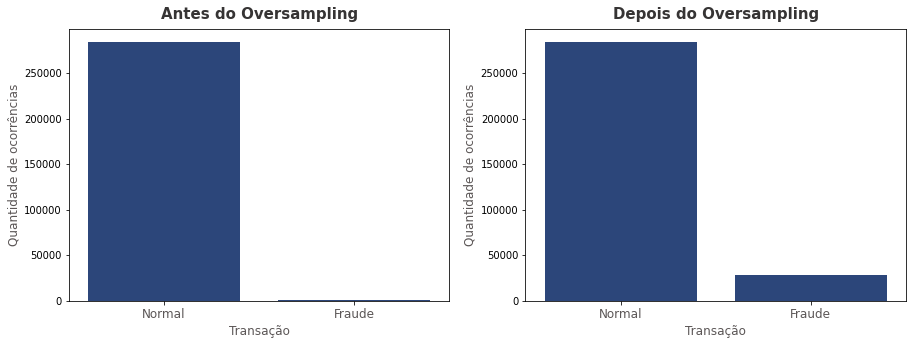

In [23]:
#Plotando um antes e depois dos dados

fig, ax = plt.subplots(ncols= 2, figsize = (15,5))


sns.countplot(df.Class, ax = ax[0], color= azul)
ax[0].set_title('Antes do Oversampling',
                fontsize = 15,
                color = preto_titulo, 
                pad= 10, 
                fontweight= 'bold')
ax[0].set_xlabel('Transação',fontsize = 12, color= preto_elementos)
ax[0].set_ylabel('Quantidade de ocorrências',fontsize = 12, color= preto_elementos)
ax[0].set_xticklabels(labels = ['Normal','Fraude'],fontsize = 12, color= preto_elementos)


sns.countplot(y_over, ax = ax[1], color= azul)
ax[1].set_title('Depois do Oversampling',
                fontsize = 15,
                color = preto_titulo, 
                pad= 10, 
                fontweight= 'bold')
ax[1].set_xlabel('Transação',fontsize = 12, color= preto_elementos)
ax[1].set_ylabel('Quantidade de ocorrências',fontsize = 12, color= preto_elementos)
ax[1].set_xticklabels(labels = ['Normal','Fraude'],fontsize = 12, color= preto_elementos)




## Undersampling


In [24]:
#Importando o modelo de Undersampling

nm = NearMiss()

In [25]:
#Ajustando o modelo com os dados e os atribuindo a novas variáveis

X_under, y_under = nm.fit_resample(X_over, y_over)

[Text(0, 0, 'Normal'), Text(0, 0, 'Fraude')]

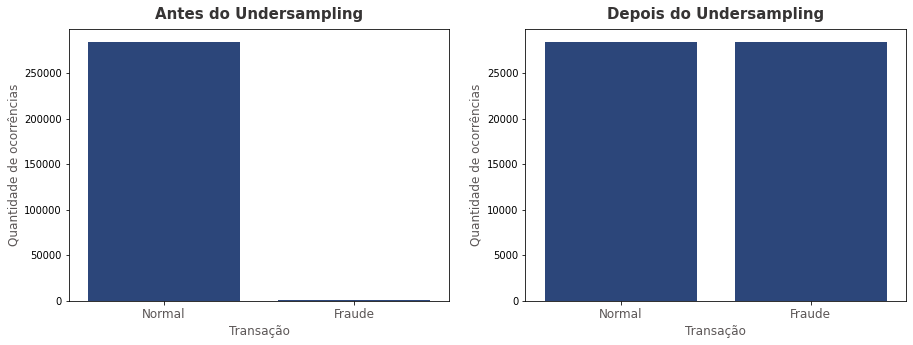

In [26]:
#Plotando um antes e depois dos dados

fig, ax = plt.subplots(ncols= 2, figsize = (15,5))


sns.countplot(df.Class, ax = ax[0], color= azul)
ax[0].set_title('Antes do Undersampling',
                fontsize = 15,
                color = preto_titulo, 
                pad= 10, 
                fontweight= 'bold')
ax[0].set_xlabel('Transação',fontsize = 12, color= preto_elementos)
ax[0].set_ylabel('Quantidade de ocorrências',fontsize = 12, color= preto_elementos)
ax[0].set_xticklabels(labels = ['Normal','Fraude'],fontsize = 12, color= preto_elementos)


sns.countplot(y_under, ax = ax[1], color= azul)
ax[1].set_title('Depois do Undersampling',
                fontsize = 15,
                color = preto_titulo, 
                pad= 10, 
                fontweight= 'bold')
ax[1].set_xlabel('Transação',fontsize = 12, color= preto_elementos)
ax[1].set_ylabel('Quantidade de ocorrências',fontsize = 12, color= preto_elementos)
ax[1].set_xticklabels(labels = ['Normal','Fraude'],fontsize = 12, color= preto_elementos)




# Modelos de Machine Learning
---
Com os dados prontos, é hora de construir nossos modelos. Optei por construir cinco modelos afim de compará-los posteriormente. Os modelos que serão usados são:
* Regressão Logística
* Decision Tree
* Random Forest
* Gradient Boosting
* SGD Classifier

Depois farei um comparativo de como cada modelo se saiu neste cenário

In [27]:
#Separando os dados entre treino e teste

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

## Regressão logística

In [28]:
#Criando um modelo de Regressão Logística e ajustando-o

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

LogisticRegression()

In [29]:
#Previsão dos resultados do modelo de Regressão Logística

y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5653
           1       0.98      0.93      0.96      5720

    accuracy                           0.96     11373
   macro avg       0.96      0.96      0.96     11373
weighted avg       0.96      0.96      0.96     11373



## Decision Tree

In [30]:
#Criando um novo modelo de árvore de decisão

arvore = DecisionTreeClassifier(min_samples_leaf= 3, random_state= 10)
arvore.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=3, random_state=10)

In [31]:
#Previsão dos resultados usando árvore de decisão e avaliando-a usando o erro médio quadrado

y_pred_arvore = arvore.predict(X_test)

print("Erro médio quadrado: {}\n".format(np.sqrt(mean_squared_error(y_test, y_pred_arvore))))
#Métricas - árvore de decisão
print(classification_report(y_test, y_pred_arvore))

Erro médio quadrado: 0.10773317175546114

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5653
           1       0.99      0.99      0.99      5720

    accuracy                           0.99     11373
   macro avg       0.99      0.99      0.99     11373
weighted avg       0.99      0.99      0.99     11373



---
Nos hiperparâmetros da árvore de decisão, afim de evitar um possível overfit existem dois parâmetros que ajudam: `max_depth` e o `min_samples_leaf`. O primeiro, limita a profundidade da nossa árvore, ou seja, quantas camadas ela terá. Já o segundo, ao invés de focar na profundidade, nele é limitado quantas folhas terão em cada camada.

Se não colocarmos hiperparâmetro nenhum, a árvore irá treinar o modelo até a profundidade que achar melhor e geralmente até ter uma folha em cada camada. Isso acaba se tornando muito sensível em casos de outliers e também a probabilidade de haver um overfit se torna maior.

O padrão que escolhi usar foi o `min_samples_leaf`, acabei tendo um resultado um pouco melhor do que o `max_depth`. Usei como métrica também o erro médio quadrado, quanto menor o número, melhor.

## Random Forest

Este modelo também aceita o parâmetro que citei anteriormente, o `min_samples_leaf`. Porém foi preciso aumentar o valor pois até então estava tendo um overfit. 

In [32]:
#Criando o modelo de Random Forests
random_f = RandomForestClassifier(min_samples_leaf = 11, random_state = 10)
random_f.fit(X_train, y_train)
y_pred_rf = random_f.predict(X_test)

In [33]:
print("Erro médio quadrado: {}\n".format(np.sqrt(mean_squared_error(y_test, y_pred_rf))))
print(classification_report(y_test, y_pred_rf))

Erro médio quadrado: 0.09699612159243444

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5653
           1       0.99      0.99      0.99      5720

    accuracy                           0.99     11373
   macro avg       0.99      0.99      0.99     11373
weighted avg       0.99      0.99      0.99     11373



## Gradient Boosting

In [34]:
gbc = GradientBoostingClassifier(random_state= 10)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=10)

In [35]:
y_pred_gbc = gbc.predict(X_test)

In [36]:
print("Erro médio quadrado: {}\n".format(np.sqrt(mean_squared_error(y_test, y_pred_gbc))))
print(classification_report(y_test, y_pred_gbc))

Erro médio quadrado: 0.15802349049112058

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5653
           1       0.99      0.97      0.97      5720

    accuracy                           0.98     11373
   macro avg       0.98      0.98      0.98     11373
weighted avg       0.98      0.98      0.98     11373



## SGD Classifier

In [37]:
sgdc = SGDClassifier(random_state= 10)
sgdc.fit(X_train, y_train)
y_pred_sgdc = sgdc.predict(X_test)

In [38]:
print("Erro médio quadrado: {}\n".format(np.sqrt(mean_squared_error(y_test, y_pred_sgdc))))
print(classification_report(y_test, y_pred_sgdc))

Erro médio quadrado: 0.20155030894970347

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5653
           1       0.98      0.94      0.96      5720

    accuracy                           0.96     11373
   macro avg       0.96      0.96      0.96     11373
weighted avg       0.96      0.96      0.96     11373



## Avaliando o desempenho dos modelos


In [39]:
# Criando um dataframe para salvar as métricas
colunas = ['Modelo','Acurácia', ' Precisão','Recall','f1_score']
desempenho_modelos = pd.DataFrame(columns=colunas)
desempenho_modelos

,Modelo,Acurácia,Precisão,Recall,f1_score


In [40]:
#Para facilitar e também obter um código mais limpo, fiz uma função para ir criando e adicionando os dados no dataframe

def salva_dataframe(nome_modelo, y_test, y_pred):
    print(nome_modelo)
    print('************************************************************************')
    print('RESUMO DO MODELO - CLASSIFICATION REPORT')
 
    precision_score = metrics.precision_score(y_test, y_pred)
    recall_score = metrics.recall_score(y_test, y_pred)
    accuracy_score  = metrics.accuracy_score(y_test,y_pred)
    f1_score = metrics.f1_score(y_test,y_pred)
    
    classification_report = metrics.classification_report(y_test,y_pred)
    print(classification_report)
    
    
    desempenho_modelos.loc[len(desempenho_modelos.index)] = [nome_modelo,accuracy_score,precision_score,recall_score, f1_score]

precision_score, recall_score, accuracy_score, f1_score

In [41]:
#Salvando RL no dataframe

salva_dataframe('Regressao Logistica', y_test, y_pred)

Regressao Logistica
************************************************************************
RESUMO DO MODELO - CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5653
           1       0.98      0.93      0.96      5720

    accuracy                           0.96     11373
   macro avg       0.96      0.96      0.96     11373
weighted avg       0.96      0.96      0.96     11373



In [42]:
#Salvando a DT no dataframe

salva_dataframe('DecisionTree', y_test, y_pred_arvore)

DecisionTree
************************************************************************
RESUMO DO MODELO - CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5653
           1       0.99      0.99      0.99      5720

    accuracy                           0.99     11373
   macro avg       0.99      0.99      0.99     11373
weighted avg       0.99      0.99      0.99     11373



In [43]:
#Salvando a RF no dataframe

salva_dataframe('Random Forest', y_test, y_pred_rf)

Random Forest
************************************************************************
RESUMO DO MODELO - CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5653
           1       0.99      0.99      0.99      5720

    accuracy                           0.99     11373
   macro avg       0.99      0.99      0.99     11373
weighted avg       0.99      0.99      0.99     11373



In [44]:
#Salvando o GB no dataframe

salva_dataframe('Gradient Boosting', y_test, y_pred_gbc)

Gradient Boosting
************************************************************************
RESUMO DO MODELO - CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5653
           1       0.99      0.97      0.97      5720

    accuracy                           0.98     11373
   macro avg       0.98      0.98      0.98     11373
weighted avg       0.98      0.98      0.98     11373



In [45]:
#Salvando o SGD no dataframe

salva_dataframe('SGD Classifier', y_test, y_pred_sgdc)

SGD Classifier
************************************************************************
RESUMO DO MODELO - CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5653
           1       0.98      0.94      0.96      5720

    accuracy                           0.96     11373
   macro avg       0.96      0.96      0.96     11373
weighted avg       0.96      0.96      0.96     11373



In [46]:
#Printando o dataframe

desempenho_modelos

,Modelo,Acurácia,Precisão,Recall,f1_score
0,Regressao Logistica,0.957355,0.981247,0.933042,0.956537
1,DecisionTree,0.988394,0.988291,0.988636,0.988464
2,Random Forest,0.990592,0.993494,0.987762,0.990620
3,Gradient Boosting,0.975029,0.985011,0.965035,0.974921
4,SGD Classifier,0.959377,0.978522,0.939860,0.958801


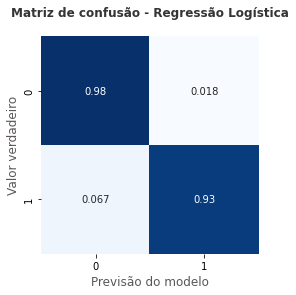

In [47]:
#Plotando matriz de confusão - RL

matriz = confusion_matrix(y_test, y_pred, normalize= 'true')
sns.heatmap(matriz, square=True, annot=True, cbar=False, cmap= 'Blues')

plt.title('Matriz de confusão - Regressão Logística',
          fontsize = 12,
          color = preto_titulo, 
          pad= 20, 
          fontweight= 'bold')

plt.xlabel('Previsão do modelo',fontsize = 12, color= preto_elementos)
plt.ylabel('Valor verdadeiro'  ,fontsize = 12, color= preto_elementos)

plt.show()

Erro médio quadrado: 0.10773317175546114



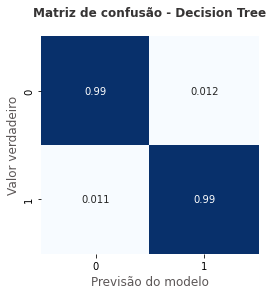

In [48]:
#Plotando matriz de confusão - DT

print("Erro médio quadrado: {}\n".format(np.sqrt(mean_squared_error(y_test, y_pred_arvore))))
matriz = confusion_matrix(y_test, y_pred_arvore, normalize= 'true')
sns.heatmap(matriz, square=True, annot=True, cbar=False, cmap= 'Blues')

plt.title('Matriz de confusão - Decision Tree',
          fontsize = 12,
          color = preto_titulo, 
          pad= 20, 
          fontweight= 'bold')
plt.xlabel('Previsão do modelo',fontsize = 12, color= preto_elementos)
plt.ylabel('Valor verdadeiro'  ,fontsize = 12, color= preto_elementos)

plt.show()

Erro médio quadrado: 0.09699612159243444



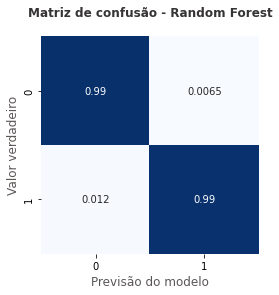

In [49]:
#Plotando matriz de confusão - RF

print("Erro médio quadrado: {}\n".format(np.sqrt(mean_squared_error(y_test, y_pred_rf))))
matriz = confusion_matrix(y_test, y_pred_rf, normalize= 'true')
sns.heatmap(matriz, square=True, annot=True, cbar=False, cmap= 'Blues')

plt.title('Matriz de confusão - Random Forest',
          fontsize = 12,
          color = preto_titulo, 
          pad= 20, 
          fontweight= 'bold')
plt.xlabel('Previsão do modelo',fontsize = 12, color= preto_elementos)
plt.ylabel('Valor verdadeiro'  ,fontsize = 12, color= preto_elementos)

plt.show()

Erro médio quadrado: 0.15802349049112058



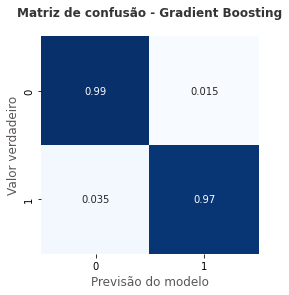

In [50]:
#Plotando matriz de confusão - GB

print("Erro médio quadrado: {}\n".format(np.sqrt(mean_squared_error(y_test, y_pred_gbc))))
matriz = confusion_matrix(y_test, y_pred_gbc, normalize= 'true')
sns.heatmap(matriz, square=True, annot=True, cbar=False, cmap= 'Blues')

plt.title('Matriz de confusão - Gradient Boosting',
          fontsize = 12,
          color = preto_titulo, 
          pad= 20, 
          fontweight= 'bold')
plt.xlabel('Previsão do modelo',fontsize = 12, color= preto_elementos)
plt.ylabel('Valor verdadeiro'  ,fontsize = 12, color= preto_elementos)

plt.show()

Erro médio quadrado: 0.20155030894970347



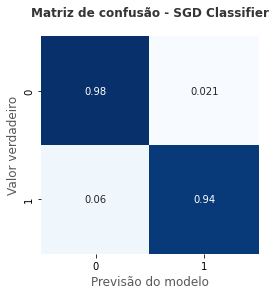

In [51]:
#Plotando matriz de confusão - SGD

print("Erro médio quadrado: {}\n".format(np.sqrt(mean_squared_error(y_test, y_pred_sgdc))))
matriz = confusion_matrix(y_test, y_pred_sgdc, normalize= 'true')
sns.heatmap(matriz, square=True, annot=True, cbar=False, cmap= 'Blues')

plt.title('Matriz de confusão - SGD Classifier',
          fontsize = 12,
          color = preto_titulo, 
          pad= 20, 
          fontweight= 'bold')
plt.xlabel('Previsão do modelo',fontsize = 12, color= preto_elementos)
plt.ylabel('Valor verdadeiro'  ,fontsize = 12, color= preto_elementos)

plt.show()

# Resumo -  Estatísticas dos modelos

Primeiramente, precisarei dar um `pd.melt` no meu dataframe. No barplot da biblioteca *plotly*, cada linha do data frame é representado por um retângulo na imagem, então, irei refazer meu dataframe com apenas 3 colunas. Modelo, Métricas e Valores. Cada modelo agora terá uma linha para cada métrica com seus respectivos valores.


In [52]:
desempenho_modelos = pd.melt(desempenho_modelos,id_vars=['Modelo'],var_name='Metricas', value_name='Valores')
desempenho_modelos

,Modelo,Metricas,Valores
0,Regressao Logistica,Acurácia,0.957355
1,DecisionTree,Acurácia,0.988394
2,Random Forest,Acurácia,0.990592
3,Gradient Boosting,Acurácia,0.975029
4,SGD Classifier,Acurácia,0.959377
5,Regressao Logistica,Precisão,0.981247
6,DecisionTree,Precisão,0.988291
7,Random Forest,Precisão,0.993494
8,Gradient Boosting,Precisão,0.985011
9,SGD Classifier,Precisão,0.978522


In [53]:
fig = px.bar(desempenho_modelos, 
             x="Modelo", 
             y='Valores',
             title="Resumo das estatísticas dos modelos",
             barmode='group',
             color="Metricas"
            )

fig.show()

## Conclusão
---

De início, foi apresentado um conjunto de dados com classes muito desbalanceadas e com colunas precisando de normalização. Após aplicação das técnicas de normalização, *overfit* e *underfit*, foi possível o treinamento dos modelos que o presente projeto apresentou.

Todos os modelos tiveram resultados satisfatórios, porém a *DesicionTree* e a *Random Forest* se sairam um pouco melhor ao observarmos as métricas do gráfico acima e do classification report. Com uma média de 99% de acerto 

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente. Neste cenário, seria mais interessante focar em acertar mais as transações fraudulentas do que as não-fraudulentas, em outras palavras, melhor um falso positivo em uma transação normal ser fraude do que uma transação fraudulenta ser considerada como normal.

![newplot.png](https://i.ibb.co/0mdT35g/newplot.png)
